# Coding Task 1

- Deadline (upload to Ilias): 2022-03-20 24:00
- Estimated effort: 2-5 hours
- Data on Ilias (4ms_...) with metadata file CCD-Metadata


## Tasks (maximum 12.5 points)

- Write a method (function) which removes the header information in the datafile and saves that information into a separate textfile. [0.5 points] 
- Write a function which reduces the data resolution by averaging over 1, 2, 3 and 4 nm wavelengths. Save these 4 new reduced datasets in new files. Do this (1) by writing an explicit loop and (2) by using pandas methods. Measure the running times of the two approaches. [6 points]
- Write a function which takes two wavelengths as input and plots the difference of the data at these lengths over time. [2 points] 
- Let the x-axis be in seconds, label the axes with names and units, label the plot with color and legend, make a title for the plot. Save the plot to a file. [2 points]
- Plot the full and the reduced datasets in the same figure. Is there any visual difference? [2 points]

In [114]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = (r'C:\Users\Basil\Nextcloud\UNI\_Sem6\Untitled Folder\Data\4ms_Absorbance.txt')
df = pd.read_csv(path, delimiter='\t', header=[13])

def ex_header():
      header=''  
      with open (path, 'r') as a:
        DataTemp = a.readlines()
      for i in range(13):
          header = header + str(DataTemp[i])
      file = open("header.txt","w")
      file.write(header)
      file.close()
      a.close
        
ex_header()

#print(df)

In [75]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = (r'C:\Users\Basil\Nextcloud\UNI\_Sem6\Untitled Folder\Data\4ms_Absorbance.txt')
Data = pd.read_csv(path, delimiter='\t', header=[13])



def lowres():
    Data2=np.array([''])
    Datafin=np.array([''])
    #Datafin=pd.DataFrame(Data2)
    for f in range(1,355,1):
        for i in range(2,3650,8):
            c=i+8
            Data_sum=Data.iloc[f,i:c]
            Data_av=(Data_sum.sum()/8)
            Data2 = np.append(Data2,Data_av)
    
        Data2=pd.DataFrame(Data2)
        Data2=Data2.T
        Datafin=pd.DataFrame(Datafin)
        Datafin=pd.concat([Datafin, Data2])
        Data2=Data2.T
    #print(Datafin)
    np.savetxt('Reduced_Data.txt', Datafin, delimiter = '\t')
        
lowres()


  0                     1         2        3                     4    \
0                       NaN       NaN      NaN                   NaN   
0      -0.41555362500000004  -0.10008  1.80502  -0.44847337500000006   
0      -0.41555362500000004  -0.10008  1.80502  -0.44847337500000006   

                    5                    6           7    \
0                   NaN                  NaN         NaN   
0  -0.02281687500000001  0.32295537500000004  1.55201875   
0  -0.02281687500000001  0.32295537500000004  1.55201875   

                    8             9    ...        903        904        905  \
0                   NaN           NaN  ...        NaN        NaN        NaN   
0  -0.10409449999999998  -0.162272125  ...        NaN        NaN        NaN   
0  -0.10409449999999998  -0.162272125  ... -0.0387111 -0.0383985 -0.0381405   

         906        907        908        909        910        911        912  
0        NaN        NaN        NaN        NaN        NaN        NaN     

In [113]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = (r'C:\Users\Basil\Nextcloud\UNI\_Sem6\Untitled Folder\Data\4ms_Absorbance.txt')
Data = pd.read_csv(path, delimiter='\t', header=[13])


def pandaszüg():
    Datanp = np.array(Data.iloc[:,2:])
    Datared = Datanp.reshape(-1,355)
    #print(Datared)
    
    
pandaszüg()

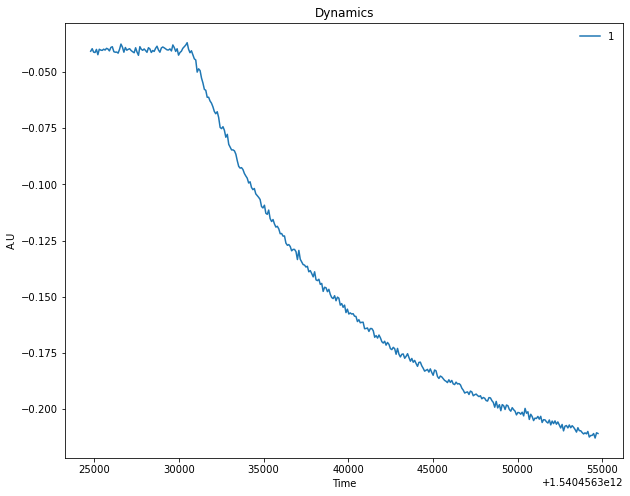

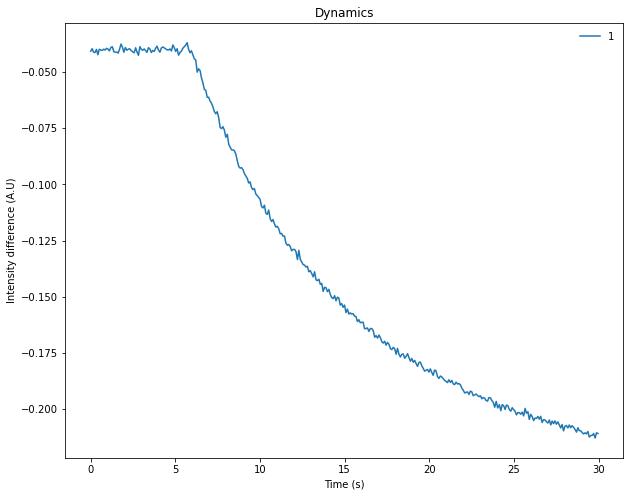

In [14]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = (r'C:\Users\Basil\Nextcloud\UNI\_Sem6\Untitled Folder\Data\4ms_Absorbance.txt')
Data = pd.read_csv(path, delimiter='\t', header=[13])


Data=Data.T
Data2=Data.iloc[1950,:]-Data.iloc[1800,:]
Data2=Data2.T
Data=Data.T

fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.plot(Data.iloc[:,1], Data2, label=1)


    
plt.title("Dynamics")
plt.legend(loc='upper right',frameon= False);
ax = ax.set(xlabel='Time', ylabel='A.U')
plt.show()

Data_in_s = Data.iloc[:,1]/1000

Data_in_s = Data_in_s-1540456324.789


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.plot(Data_in_s, Data2, label=1)


    
plt.title("Dynamics")
plt.legend(loc='upper right',frameon= False);
ax = ax.set(xlabel='Time (s)', ylabel='Intensity difference (A.U)')
plt.savefig('Dynamics.png')
plt.show()



[[ 0.329672  0.329672  0.329672 ...  0.360495  0.462293  0.167149]
 [ 0.201587  0.319932  0.203473 ...  1.320787  1.225394  1.234676]
 [ 1.207459  1.231326  1.186758 ...  0.096166  0.097081  0.095487]
 ...
 [-0.051726 -0.051909 -0.052915 ... -0.050323 -0.05033  -0.051562]
 [-0.049698 -0.049404 -0.048064 ... -0.039863 -0.038594 -0.040911]
 [-0.040988 -0.041198 -0.039991 ... -0.034768 -0.036334 -0.034725]]


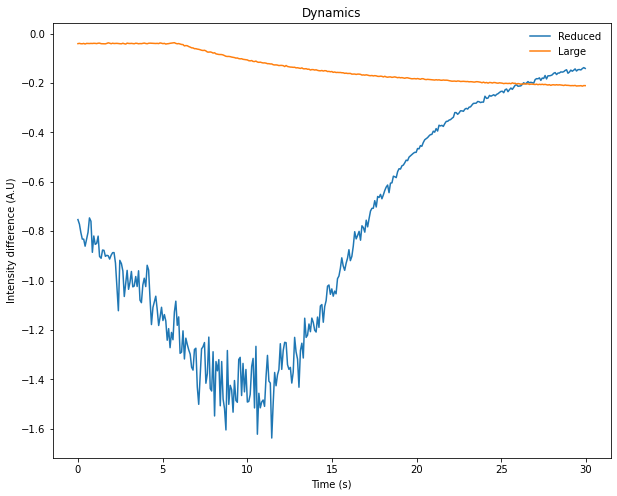

In [112]:
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

path = (r'C:\Users\Basil\Nextcloud\UNI\_Sem6\Untitled Folder\Data\4ms_Absorbance.txt')
Data = pd.read_csv(path, delimiter='\t', header=[13])


Datanp = np.array(Data.iloc[:,2:])
Datared = Datanp.reshape(-1,355)
print(Datared)

    
Datared=pd.DataFrame(Datared)

Data_in_s = Data.iloc[:,1]/1000
Data_in_s = Data_in_s-1540456324.789

Data2=Datared.iloc[1950,:]-Datared.iloc[1800,:]
Data3=Data.iloc[:,1950]-Data.iloc[:,1800]


fig = plt.figure(figsize=(10,8))
ax = plt.axes()

plt.plot(Data_in_s, Data2, label='Reduced')
plt.plot(Data_in_s, Data3, label='Large')

    
plt.title("Dynamics")
plt.legend(loc='upper right',frameon= False);
ax = ax.set(xlabel='Time (s)', ylabel='Intensity difference (A.U)')
plt.savefig('Dynamics.png')
plt.show()

